## State Vaccination Data Processing


#### The Data: 
The vaccination data was obtained from the CDC, the Center for Disease Control. Which maintains daily data of recorded vaccines by state [here](https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc). 

The features of interest for our analysis are:
* `Date` the date of current vaccine data
* `Location` the letter state code 
* `Administered` counts of doses administered based on state __where administered__
* `Administered_XXPlus` counts of doses administered to those age XX and older based on the jurisdiction __where recipient lives__
* `Series_Complete_Yes` total number of people who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction __where recipient lives__
* `Series_Complete_XXPlus` total number of people 12+ who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction __where recipient lives__

#### The Significance: 
Since COVID has been shown to spread more indoors than outdoors, during extreme temperatures people are more likely to gather inside which may contribute to an increase in transmission. The temperature data, while is does not include other weather factors such as rain or snow, may improve modeling by capturing these indoor gathering tendencies. 

In [27]:
import pandas as pd

In [28]:
#data source: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc
vaccine_data = pd.read_csv('../data/us_vaccination_data.csv')

In [29]:
vaccine_data.loc[:,'Date'] = pd.to_datetime(vaccine_data['Date'])
vaccine_data.head(2)

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct,Additional_Doses_Moderna,Additional_Doses_Pfizer,Additional_Doses_Janssen,Additional_Doses_Unk_Manuf
0,2021-11-18,46,WI,9104875,401300,3498440,5205135,0,156376,182105,...,798557.0,24.7,631862.0,34.5,453152.0,48.2,288513.0,503091.0,7579.0,25.0
1,2021-11-18,46,ME,2577840,140100,1045780,1391960,0,191773,217551,...,210467.0,23.2,177348.0,33.2,130614.0,47.6,88826.0,118554.0,3025.0,177.0


In [30]:
vaccine_data.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Dist_Per_100K', 'Distributed_Per_100k_12Plus',
       'Distributed_Per_100k_18Plus', 'Distributed_Per_100k_65Plus',
       'Administered', 'Administered_12Plus', 'Administered_18Plus',
       'Administered_65Plus', 'Administered_Janssen', 'Administered_Moderna',
       'Administered_Pfizer', 'Administered_Unk_Manuf', 'Admin_Per_100K',
       'Admin_Per_100k_12Plus', 'Admin_Per_100k_18Plus',
       'Admin_Per_100k_65Plus', 'Recip_Administered',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_

In [31]:
vaccine_data['Location'].unique()

array(['WI', 'ME', 'TN', 'MH', 'AK', 'DC', 'SC', 'US', 'OK', 'AZ', 'DD2',
       'VI', 'IA', 'MP', 'RI', 'GA', 'UT', 'ID', 'NE', 'ND', 'VA2', 'NH',
       'VA', 'PR', 'IH2', 'HI', 'AS', 'PA', 'CT', 'IN', 'NM', 'TX', 'WY',
       'MT', 'MD', 'RP', 'DE', 'NJ', 'IL', 'AR', 'MI', 'KS', 'WV', 'WA',
       'SD', 'OR', 'VT', 'BP2', 'NY', 'CO', 'NV', 'KY', 'MO', 'LA', 'MA',
       'MS', 'NC', 'MN', 'FM', 'GU', 'AL', 'FL', 'CA', 'OH', 'LTC'],
      dtype=object)

Since locations are store with abbreviations, we will convert these to full state names for consistency. 

In [32]:
# convert state codes to state names
# dict creds to: https://gist.github.com/rugbyprof/76575b470b6772ce8fa0c49e23931d97
states_codes_dict = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas",
          "CA":"California","CO":"Colorado","CT":"Connecticut","DE":"Delaware",
          "FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho",
          "IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas",
          "KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland",
          "MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi",
          "MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada",
          "NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York",
          "NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma",
          "OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina",
          "SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont",
          "VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}
states_codes_dict['DC'] = 'District of Columbia'

In [33]:
vaccine_data.replace({'Location':states_codes_dict}, inplace=True)

In [34]:
# restrict down to contiguous regions in the US
#vaccine_data['Location'].unique()
contiguous_US = ['Michigan','Wyoming','Maryland','Massachusetts','Rhode Island','Oregon',
                 'Pennsylvania','West Virginia','District of Columbia','Maine','Indiana',
                 'Nevada','Georgia','New Mexico','Colorado','Virginia','Kentucky','Minnesota',
                 'Arkansas','Connecticut','North Carolina','Montana','Oklahoma','Louisiana',
                 'Nebraska','Alabama','Florida','North Dakota','Delaware','Vermont','Idaho',
                 'Kansas','Wisconsin','New Jersey','Iowa','Missouri','New York','Utah',
                 'Washington','Arizona','Tennessee','Ohio','Texas','Mississippi','South Carolina',
                 'California','New Hampshire','South Dakota','Illinois']
cont_vaccine_data = vaccine_data[vaccine_data['Location'].isin(contiguous_US)]
cont_vaccine_data['Location'].nunique()

49

Let's now extract the portion of the data that contains our features of interest.  

In [35]:
features = ['Date','Location','Administered','Administered_12Plus','Administered_18Plus','Administered_65Plus', 
           'Series_Complete_Yes', 'Series_Complete_12Plus','Series_Complete_18Plus', 'Series_Complete_65Plus']
cont_vaccine_data = cont_vaccine_data[features]
cont_vaccine_data

,Date,Location,Administered,Administered_12Plus,Administered_18Plus,Administered_65Plus,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_18Plus,Series_Complete_65Plus
0,2021-11-18,Wisconsin,7894520,7841780,7389860,2431771,3440272,3440016,3230556,940658
1,2021-11-18,Maine,2138582,2123392,2005383,695187,964009,963965,908548,274302
2,2021-11-18,Tennessee,7940729,7916920,7531012,2412611,3355930,3355609,3184450,928581
5,2021-11-18,District of Columbia,1132019,1127444,1084669,219742,449491,449429,430040,76083
6,2021-11-18,South Carolina,6020753,5993515,5681965,1970994,2621180,2618297,2474631,785941
...,...,...,...,...,...,...,...,...,...,...
22025,2020-12-14,Connecticut,0,0,0,0,0,0,0,0
22026,2020-12-14,Wyoming,0,0,0,0,0,0,0,0
22030,2020-12-14,Vermont,0,0,0,0,0,0,0,0
22032,2020-12-14,Mississippi,0,0,0,0,0,0,0,0


### Visualizations 

To get a sense of what the vaccine data looks like and any potentially missing values, let's plot some of the features of interest over time, focusing on a single state (California). 

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
ca_data = cont_vaccine_data[cont_vaccine_data['Location']=='California']

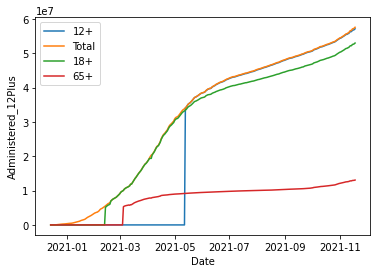

In [38]:
# very inconsistent in when the data for smaller categories was reported, as seen by the jumps. 
sns.lineplot(data=ca_data, x='Date', y='Administered_12Plus', label="12+")
sns.lineplot(data=ca_data, x='Date', y='Administered', label="Total");
sns.lineplot(data=ca_data, x='Date', y='Administered_18Plus', label="18+");
sns.lineplot(data=ca_data, x='Date', y='Administered_65Plus', label="65+");
plt.legend();

We see some significant jumps in the `_XXPlus` categories, probably deriving from changes in how vaccine data was reported over time as age recommendations and approvals changed. For now, we will stick with `Administered` to get an overall metric of vaccine roll-out by state. 

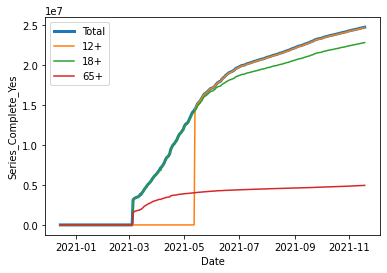

In [39]:
sns.lineplot(data=ca_data, x='Date', y='Series_Complete_Yes', label="Total", linewidth = 3)
sns.lineplot(data=ca_data, x='Date', y='Series_Complete_12Plus', label="12+");
sns.lineplot(data=ca_data, x='Date', y='Series_Complete_18Plus', label="18+");
sns.lineplot(data=ca_data, x='Date', y='Series_Complete_65Plus', label="65+");
plt.legend();

Here we see jumps for all categories, including the overall `Series_Complete_Yes` metric. However this jump might be explained by the synronous nature of the initial roll-out, with everyone getting vaccinated at the first opportunity being on the same timeline for being full vaccinated. 

### Save Processed Data

Now we save this cleaned and processed data to csv files to be used in our future modeling and analysis. For consistency we change "Location" to "State". 

In [43]:
cont_vaccine_data = cont_vaccine_data.rename(columns={"Location":"State"})

In [44]:
keep_features = ['Date','State','Administered',#'Administered_12Plus','Administered_18Plus','Administered_65Plus', 
                   'Series_Complete_Yes']#, 'Series_Complete_12Plus','Series_Complete_18Plus', 'Series_Complete_65Plus']
cont_vaccine_data = cont_vaccine_data[keep_features]

In [45]:
cont_vaccine_data.to_csv('../data/vaccine_data.csv')